<img src="./logo_UTN_3.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal 4bis
### Axel Nathanel Nahum


## Introduccion

En este notebook encontraremos el diseño de un filtro $Pasa-Banda$ apartir de una plantilla dada. Se realizara una transformacion de un $Pasa-Bajo$ a un $Pasa-Banda$, mediante un nucleo de transformacion.

## Resolucion

### Resolucion original

In [2]:
from IPython.display import IFrame
IFrame("./Resolucion_4bis.pdf", width=900, height=1000)

In [25]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

In [26]:
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS

from pytc2.general import print_subtitle

from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

In [56]:
def q_print(cant_q, qq):

    all_sys = []
    filter_names = []
    
    Ωwp = 1
    Ωws = 2.17

    # Orden del filtro
    nn = 3

    αmax = 3
    e = np.sqrt(10**(αmax/10) - 1) # "epsilon"

    for n in range (1 , 9):
     αminn = 10 * np.log10(1 + (e**2 * Ωws**(2*n)))

    Z,P,K = sig.buttap(nn)
    Num,Den = sig.zpk2tf(Z,P,K)
    Num_mp,Den_mp = sig.lp2bp(Num,Den, e**(-1/3))

    TF = TransferFunction(3 * Num_mp, Den_mp)
    
    this_label = 'q' + str(cant_q[0]) + ' = ' + str(round(qq[0], 4)) + '\n \n' + 'q' + str(cant_q[1]) + ' = ' + str(round(qq[1], 4)) + '\n \n' + 'q' + str(cant_q[2]) + ' = ' + str(round(qq[2], 4))

    filter_names.append(this_label)

    analyze_sys(TF, filter_names)

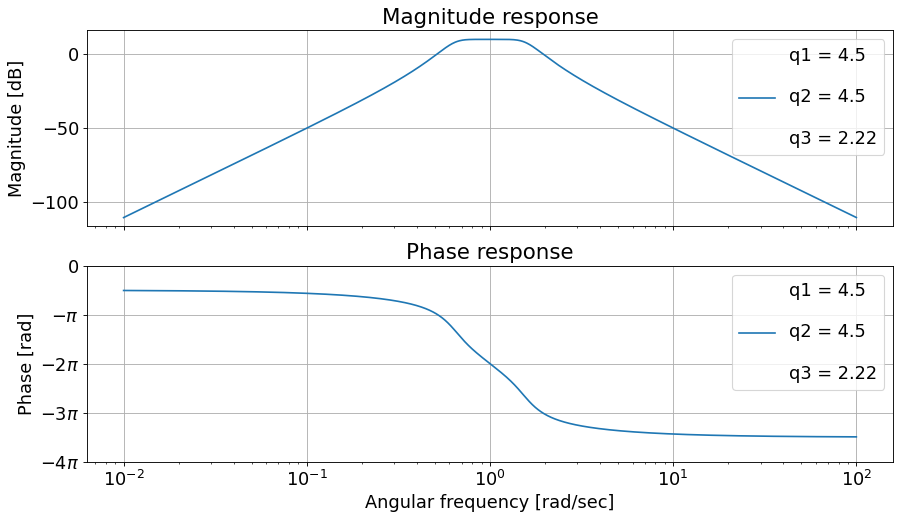

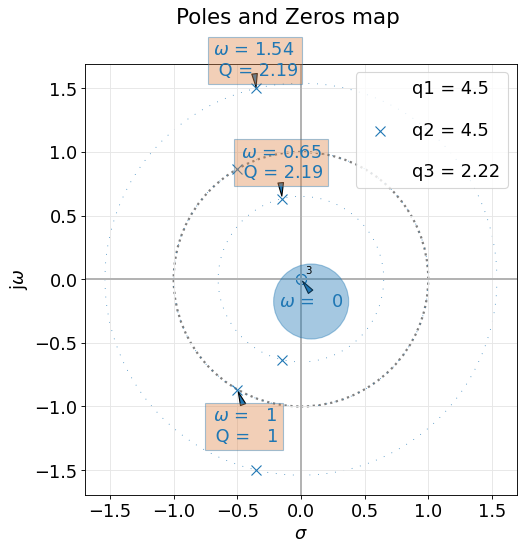

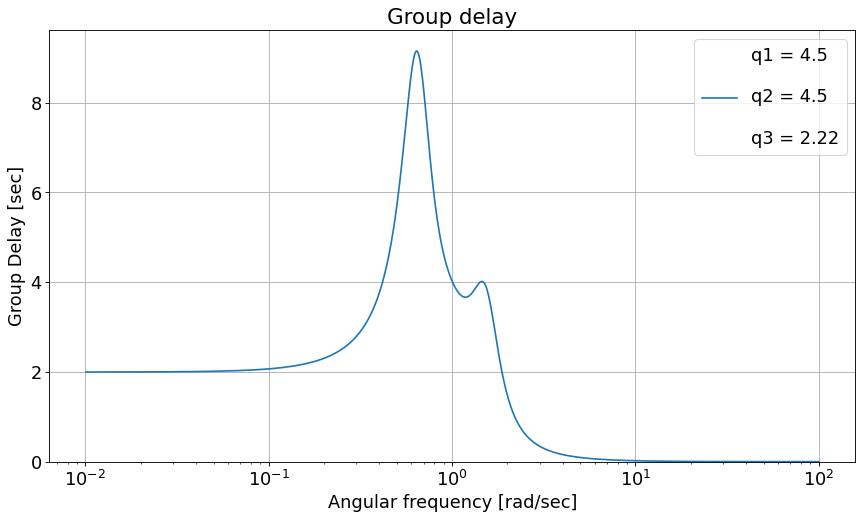

In [63]:
cant_q = [1, 2, 3]

qq1 = 4.50
qq2 = 4.50
qq3 = 2.22

qq = [qq1, qq2, qq3]

q_print(cant_q, qq)

En estos graficos podremos observar y analizar la $respuesta$ $en$ $frecuencia$ $normalizada$ en distintos $\omega_0$ correspondiente a cada etapa de este filtro $Pasa-Bandas$ de $orden$ $6$, ademas de observar los polos y ceros de la transferencia calculada previamente. Los polos de este filtro se encuentran en distintos $\omega_0$ con sus respectivos Q.

$La$ $transferencia$ $asociada$ $a$ $estos$ $graficos$ $es:$

$$ T(s) = \frac{V_2}{V_1} = \frac{\frac{\omega_01}{Q1} . S}{s^2 + s. \frac{\omega_01}{Q1} + \omega_01^2} * \frac{\frac{\omega_02}{Q2} . S}{s^2 + s. \frac{\omega_02}{Q2} + \omega_02^2} * \frac{\frac{\omega_03}{Q3} . S}{s^2 + s. \frac{\omega_03}{Q3} + \omega_03^2}$$

$Donde:$

* $\omega_01 = 1.21$ y $Q1 = 4.50$. Esto es corresponde a una $transferencia$ $normalizada$.
* $\omega_02 = 0.82$ y $Q2 = 4.51$.
* $\omega_03 = 1$ y $Q3 = 2.22$.

En esta se puede observar claramente dos filtros $Pasa-Bandas$ en $cascada$, los tres de segundo orden. Esta transferencia se encuentra normalizada en los distintos $w_0$.

Como $e**(-1/3)$ es practicamente 1, la transferencia $normalizada$ queda igual al anterior.

$$ T(s) = \frac{V_2}{V_1} = \frac{\frac{\omega_01}{Q1} . S}{s^2 + s. \frac{\omega_01}{Q1} + \omega_01^2} * \frac{\frac{\omega_02}{Q2} . S}{s^2 + s. \frac{\omega_02}{Q2} + \omega_02^2} * \frac{\frac{\omega_03}{Q3} . S}{s^2 + s. \frac{\omega_03}{Q3} + \omega_03^2}$$

Esta ultima sera representada por el grafico proximo de LTspice, eligiendo mostrarla solamente para una frecuencia de 1Hz. Esto debido a un problema con el circuito. Este provocaba que al desnormalizar en 2 MHz, la ganancia aumente mucho y no se quede en 10dB.

In [54]:
import numpy as np

Q = 2.22

den = [1, 2 / Q, 3 + 2 / (Q ** 2), 4 / Q + 1 / Q**3, 3 + 2 / (Q ** 2), 2 / Q, 1]
print(f'Denominador: {den}')
roots = np.roots(den)
print("\n")
print(f'roots: {roots}')

Denominador: [1, 0.9009009009009008, 3.4058112166220273, 1.8932007244644204, 3.4058112166220273, 0.9009009009009008, 1]


roots: [-0.13429945+1.20788517j -0.13429945-1.20788517j -0.22522523+0.97430673j
 -0.22522523-0.97430673j -0.09092577+0.81778363j -0.09092577-0.81778363j]


In [55]:
polos_etapa_1 = roots[0]  # Y su conjugado
parte_real = polos_etapa_1.real
w0_polo = abs(polos_etapa_1)
print(f'Denominador etapa 1: s^2 + {-2*parte_real}*s + {w0_polo ** 2}')

polos_etapa_2 = roots[2]  # Y su conjugado
parte_real = polos_etapa_2.real
w0_polo = abs(polos_etapa_2)
print(f'Denominador etapa 2: s^2 + {-2*parte_real}*s + {w0_polo ** 2}')

polos_etapa_3 = roots[4]  # Y su conjugado
parte_real = polos_etapa_3.real
w0_polo = abs(polos_etapa_3)
print(f'enominador etapa 3: s^2 + {-2*parte_real}*s + {w0_polo ** 2}')

Denominador etapa 1: s^2 + 0.2685989029760419*s + 1.4770229162545476
Denominador etapa 2: s^2 + 0.45045045045045595*s + 1.0000000000000115
Denominador etapa 3: s^2 + 0.1818515474744042*s + 0.6770375659003306


En estos ultimos codigos se observan los distintos $denominadores$ de cada filtro. Tambien se puede observar en el PDF.

## Circuito LTspice

<img src="./Circuito_4bis.PNG" align="middle" width="1050" /> 

## Respuesta en frecuencia LTspice

<img src="./Respuesta_Frecuencia_4bis.PNG" align="middle" width="1000" /> 

<img src="./Respuesta_Frecuencia_4bis2.PNG" align="middle" width="1000" /> 


## Plantilla

<img src="./Plantilla_4bis.PNG" align="center" width="600" /> 

El el primer grafico de LTspice se observa la $respuesta$ $en$ $frecuencia$ $de$ $un$ $filtro$ $Pasa_Bandas$ de $maxima$ $planicidad$ calculado previamente. En este se puede ver como se verifica que a $1Hz$ ($Frecuencia$ $Central$) (el cual deberia ser 2 MHz pero por ya se explico porque no se hizo, en el analisis de los graficos de Python), la $ganancia$ es de $10$ $dB$ aproximadamente. Aca se verifica la ganancia pedida por la plantilla. 


## Otro caso

Tomar al $\alpha max$ en $7dB$ (es decir, 10dB - 3dB) y calcular a partir de ahi. Los mismo para $\alpha min$ pero en este caso de $10dB$.